<a href="https://colab.research.google.com/github/leonardoub/SCRIPT_PALERMO/blob/master/BIS_explore_database_PA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Analisi fatta selezionando solo i pazienti con Overall_Stage uguale a I o II, in maniera tale da uniformare tale features sia sul database pubblico che su quello di Palermo. Infatti nel database pubblico sono presenti Overall_Stage = I, II, IIIa e IIIB; mentre nel datbase di Palermo sono prensenti sono Overall_Stage = I e II.

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy

#Load data

In [6]:
#load data from Drive
from google.colab import drive
drive.mount('/gdrive')
#%cd /gdrive

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive


In [0]:
train_dataset_path = '/gdrive/My Drive/AIM_PA/database_training2.csv'
test_dataset_path = '/gdrive/My Drive/AIM_PA/database_nostro_without_nan.csv'

Dal database di Palermo sono stati tolti 13 casi per i quali non si aveva Hisology. I pazienti tolti hanno tutti Overall_Stage = I.

In [0]:
df_train = pd.read_csv(train_dataset_path)
df_test = pd.read_csv(test_dataset_path)

In [0]:
df_train.rename(columns={'Survival.time (months)':'Surv_time_months'}, inplace=True)

In [0]:
df_test.rename(columns={'Survival.time (months)':'Surv_time_months'}, inplace=True)

In [0]:
df_train.rename(columns={'Overall.Stage':'Overall_Stage'}, inplace=True)
df_test.rename(columns={'Overall.Stage':'Overall_Stage'}, inplace=True)

In [0]:
df_train.rename(columns={'deadstatus.event':'Deadstatus_event'}, inplace=True)
df_test.rename(columns={'deadstatus.event':'Deadstatus_event'}, inplace=True)

In [0]:
#train_data = df_train.drop(['Histology', 'Surv_time_months', 'OS', 'deadstatus.event','Overall_Stage'], axis=1)

In [0]:
#test_data = df_test.drop(['Histology', 'Surv_time_months', 'OS', 'deadstatus.event','Overall_Stage'], axis=1)

In [0]:
#train_labels = df_train.Histology

In [0]:
#test_labels = df_test.Histology

Nel database di Palermo ci sono solo 5 soggetti che hanno Overall_Stage = II. Sia considerando la versione in cui sono stati tolti i pazienti per i quali non si ha Histology che quella originale.

In [25]:
df_train.Overall_Stage.unique()

array(['I', 'IIIa', 'IIIb', 'II', nan], dtype=object)

In [26]:
df_test.Overall_Stage.unique()

array(['I', 'II'], dtype=object)

In [34]:
list(df_train.Overall_Stage).count('I')

27

In [35]:
list(df_train.Overall_Stage).count('II')

13

In [36]:
list(df_test.Overall_Stage).count('I')

29

In [38]:
list(df_test.Overall_Stage).count('II')

5

In [0]:
#considerare i casi del database di Palermo che hanno Overall_Stage = I o II
df_train_selected = df_train.loc[(df_train['Overall_Stage']=='I') | (df_train['Overall_Stage']=='II')]

In [43]:
df_train_selected

,Histology,Surv_time_months,OS,Deadstatus_event,VoxelVolume,Maximum3DDiameter,MeshVolume,MajorAxisLength,Sphericity,LeastAxisLength,Elongation,SurfaceVolumeRatio,Maximum2DDiameterSlice,Flatness,SurfaceArea,MinorAxisLength,Maximum2DDiameterColumn,Maximum2DDiameterRow,GrayLevelVariance,HighGrayLevelEmphasis,DependenceEntropy,DependenceNonUniformity,GrayLevelNonUniformity,SmallDependenceEmphasis,SmallDependenceHighGrayLevelEmphasis,DependenceNonUniformityNormalized,LargeDependenceEmphasis,LargeDependenceLowGrayLevelEmphasis,DependenceVariance,LargeDependenceHighGrayLevelEmphasis,SmallDependenceLowGrayLevelEmphasis,LowGrayLevelEmphasis,JointAverage,SumAverage,JointEntropy,ClusterShade,MaximumProbability,Idmn,JointEnergy,Contrast,...,Kurtosis,Mean,ShortRunLowGrayLevelEmphasis,GrayLevelVariance.1,LowGrayLevelRunEmphasis,GrayLevelNonUniformityNormalized,RunVariance,GrayLevelNonUniformity.1,LongRunEmphasis,ShortRunHighGrayLevelEmphasis,RunLengthNonUniformity,ShortRunEmphasis,LongRunHighGrayLevelEmphasis,RunPercentage,LongRunLowGrayLevelEmphasis,RunEntropy,HighGrayLevelRunEmphasis,RunLengthNonUniformityNormalized,GrayLevelVariance.2,ZoneVariance,GrayLevelNonUniformityNormalized.1,SizeZoneNonUniformityNormalized,SizeZoneNonUniformity,GrayLevelNonUniformity.2,LargeAreaEmphasis,SmallAreaHighGrayLevelEmphasis,ZonePercentage,LargeAreaLowGrayLevelEmphasis,LargeAreaHighGrayLevelEmphasis,HighGrayLevelZoneEmphasis,SmallAreaEmphasis,LowGrayLevelZoneEmphasis,ZoneEntropy,SmallAreaLowGrayLevelEmphasis,Coarseness,Complexity,Strength,Contrast.1,Busyness,Overall_Stage
0,adenocarcinoma,5,1_anno,1,51905.377962,66.288317,51847.748274,50.574214,0.649258,37.884620,0.821088,0.199752,63.135672,0.749090,10356.675894,41.525899,65.067279,55.325619,12.481889,1084.854684,5.949646,918.046673,5312.127441,0.122582,97.652454,0.050648,141.807349,0.124010,42.380287,163828.301666,0.000266,0.001208,33.190463,66.380925,4.331076,-475.448161,0.308299,0.994676,0.133643,8.029403,...,17.777521,5.650502,0.001166,17.478141,0.001372,0.192540,1.399893,2288.112500,3.749302,793.234742,6675.859117,0.776723,4220.221337,0.654950,0.003806,4.209293,1049.544424,0.560736,34.869500,42116.076135,0.060025,0.517739,1145.238698,132.775769,42183.224231,540.316964,0.122035,36.510775,4.877236e+07,751.520796,0.747563,0.002453,5.741322,0.001663,0.000357,928.016789,1.153806,0.020920,1.306338,I
1,adenocarcinoma,18,2_anni,1,13432.502747,58.057539,13312.697411,48.354803,0.572236,18.135097,0.546338,0.356577,40.146103,0.375042,4747.006589,26.418066,32.760898,56.652510,60.615944,1076.589137,7.130906,595.667519,351.846858,0.307871,239.202712,0.126873,32.011715,0.031426,12.612334,41890.348882,0.001812,0.003214,33.522040,67.044080,7.487967,-2829.110940,0.055759,0.985695,0.015596,38.337756,...,5.224099,-91.310969,0.003404,65.432452,0.003524,0.064158,0.230922,262.139314,1.567042,926.829706,3237.676584,0.908183,1777.017297,0.869059,0.004164,5.072184,1044.275778,0.790377,84.615342,598.216508,0.033349,0.543736,843.878866,51.757732,607.367912,543.633876,0.330564,0.465530,8.137725e+05,763.567010,0.764879,0.006307,6.451087,0.004959,0.001680,2944.805484,2.266070,0.146173,0.253533,I
2,adenocarcinoma,31,3_anni,0,25843.872675,52.918217,25724.437234,39.406474,0.675497,28.487740,0.891907,0.242519,46.415213,0.722920,6238.658603,35.146929,47.180420,46.322906,55.064124,1131.900166,6.932158,844.783490,1023.136953,0.253452,192.059998,0.093605,57.855402,0.045979,22.286238,79266.271357,0.000812,0.001864,34.046184,68.092368,6.796695,-3133.512010,0.106695,0.984515,0.033042,32.375097,...,5.387644,-67.724986,0.001973,61.733697,0.002096,0.085594,0.426431,626.125860,1.968083,906.575851,5266.417163,0.870954,2393.005796,0.809077,0.002930,4.968901,1079.567623,0.718481,68.928494,3157.415098,0.036760,0.531612,1319.991542,91.276279,3170.626259,525.709823,0.275125,2.306913,4.377395e+06,732.877970,0.757392,0.003456,6.294554,0.002520,0.000745,2146.780339,1.238883,0.152919,0.611772,I
3,adenocarcinoma,38,4_anni,1,22152.709032,46.635312,22099.0167

#Confronto di medie e stdev per tutte le features tra dataset di train e datset di test 

In [0]:
train_data_bis = df_train.drop(['Histology', 'OS', 'Deadstatus_event','Overall_Stage'], axis=1)

In [0]:
train_data_bis_selected = df_train_selected.drop(['Histology', 'OS', 'Deadstatus_event', 'Overall_Stage'], axis=1)

In [0]:
test_data_bis = df_test.drop(['Histology', 'OS', 'Deadstatus_event', 'Overall_Stage'], axis=1)

In [0]:
mean_train_data = train_data_bis.mean()

In [0]:
std_train_data = train_data_bis.std()

In [0]:
mean_train_data_selected = train_data_bis_selected.mean()

In [0]:
std_train_data_selected = train_data_bis_selected.std()

In [0]:
mean_test_data = test_data_bis.mean()

In [0]:
std_test_data = test_data_bis.std()

In [0]:
my_dict = {'mean_train_data': mean_train_data , 'std_train_data': std_train_data,
           'mean_train_data_selected': mean_train_data_selected , 'std_train_data_selected': std_train_data_selected, 
           'mean_test_data': mean_test_data, 'std_test_data': std_test_data}

In [0]:
result = pd.DataFrame.from_dict(my_dict)

In [0]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [93]:
result

,mean_train_data,std_train_data,mean_train_data_selected,std_train_data_selected,mean_test_data,std_test_data
Surv_time_months,2.116794e+01,1.672637e+01,2.262500e+01,1.697160e+01,1.894118e+01,9.966432e+00
VoxelVolume,7.931645e+04,8.382620e+04,7.147836e+04,8.520170e+04,1.641285e+04,1.988371e+04
Maximum3DDiameter,7.641797e+01,3.120654e+01,6.871389e+01,3.299414e+01,4.295581e+01,1.787877e+01
MeshVolume,7.916172e+04,8.379579e+04,7.134946e+04,8.516084e+04,1.633850e+04,1.985763e+04
MajorAxisLength,6.182093e+01,2.670927e+01,5.473587e+01,2.692724e+01,3.549409e+01,1.494185e+01
Sphericity,5.931281e-01,9.993818e-02,6.408436e-01,1.039703e-01,7.049689e-01,8.447242e-02
LeastAxisLength,3.407870e+01,1.442964e+01,3.183695e+01,1.459978e+01,1.986617e+01,8.304821e+00
Elongation,7.456275e-01,1.507488e-01,7.785900e-01,1.382626e-01,7.389066e-01,1.365775e-01
SurfaceVolumeRatio,2.622676e-01,1.132432e-01,2.599208e-01,1.049753e-01,3.643976e-01,1.529011e-01
Maximum2DDiameterSlice,6.221874e+01,2.457701e+01,5.635932e+01,2.526448e+01,3.502326e+01,1.386377e+01


#T-test

This is a two-sided test for the null hypothesis that 2 independent samples have identical average (expected) values. This test assumes that the populations have identical variances by default.

Rispetto alla condizione di normalità la distribuzione t è robusta. Con tale termine tecnico si intende affermare  che  rimane  approssimativamente  valida,  anche  quando  le  distribuzioni  di  dati  non  rispettano esattamente la condizione dalla normalità.

In [0]:
from scipy.stats import ttest_ind

##T-test su dati selected

In [0]:
t_test_list_selected=[]
for column in train_data_bis_selected.columns:
   stat, p_value = scipy.stats.ttest_ind(train_data_bis_selected[column], test_data_bis[column])
   t_test_list_selected.append(p_value)

In [135]:
max(t_test_list_selected)

0.9959896519863511

In [136]:
len(t_test_list_selected)

108

p-value alto   ---->   si accetta l'Hp zero   ---->   la differenza osservata è STATISTICAMENTE NON SIGNIFICATIVA

p-value basso ----> si rigetta l'Hp zero ----> la differenza osservata è STATISTICAMENTE SIGNIFICATIVA

Per aclune features si ha p-value alto, per altre p-value basso

In [137]:
t_test_list

[0.2696609823449144,
 0.00044600777055522667,
 0.00011911941165222475,
 0.0004485838932718263,
 0.00040849358893734443,
 0.005268576504640931,
 6.736329499489991e-05,
 0.21998811619300787,
 0.000890124095183722,
 3.795854579196017e-05,
 0.37180197144144955,
 6.335196152365473e-05,
 3.812702980977559e-05,
 0.00017451501403807496,
 6.904463452489892e-05,
 0.014481284554093898,
 5.140220822511427e-11,
 0.028654448437684037,
 0.0002606723691940795,
 0.003991602670768384,
 0.9655792427369092,
 6.013185531829058e-09,
 0.7313429526383952,
 0.01941512002256325,
 0.643275800960853,
 0.0003573052165860875,
 0.4043268421374918,
 0.4976662726942369,
 0.4467127079397476,
 2.240888773717023e-11,
 2.2408887736201176e-11,
 0.10163046424183717,
 0.002820634243896,
 0.003905747268744864,
 0.6077733884100304,
 0.03771579549893187,
 0.045241026365553764,
 0.4553586710035249,
 0.11088675026797512,
 0.005150801056910944,
 0.23228037794934828,
 0.3376434693524222,
 0.37151773237673136,
 2.08132792052567e-11,

##T-test su dati non selected

In [0]:
t_test_list=[]
for column in train_data_bis.columns:
   stat, p_value = scipy.stats.ttest_ind(train_data_bis[column], test_data_bis[column])
   t_test_list.append(p_value)

In [142]:
max(t_test_list)

0.9986129992471603

In [143]:
t_test_list

[0.45927361560684,
 2.5454246445245878e-05,
 1.2767771947167727e-08,
 2.5862918524898483e-05,
 1.3149189004442227e-07,
 1.2993084242091626e-08,
 1.418913179075965e-07,
 0.8137623877861164,
 2.5108213511610875e-05,
 4.643233152021441e-09,
 0.7662612202917692,
 5.53626883326472e-07,
 1.1889709846995923e-08,
 8.788490306246226e-08,
 4.3250643827895214e-08,
 0.001897350281828556,
 6.120568294140336e-18,
 0.00032505442678429825,
 6.29016782729776e-06,
 0.0016855661892072984,
 0.9203323654138849,
 6.888496452943694e-14,
 0.44787905117358917,
 2.53466835607847e-06,
 0.45191782966975425,
 2.0877842260788907e-11,
 0.9379868270785559,
 0.05728650418993231,
 0.9762486042704727,
 7.140029693094335e-19,
 7.14002969282109e-19,
 0.0018809723537027041,
 0.00020522267527232042,
 5.671510677489252e-09,
 0.18127546078244883,
 7.6290334303860264e-06,
 0.01747434265179599,
 0.18274933808332564,
 0.0787252542054645,
 0.000786598057265716,
 0.0823128883879358,
 0.043356727580159196,
 0.013377479984932921,
 1

##Plot T-test results

In [0]:
labels = train_data_bis_selected.columns

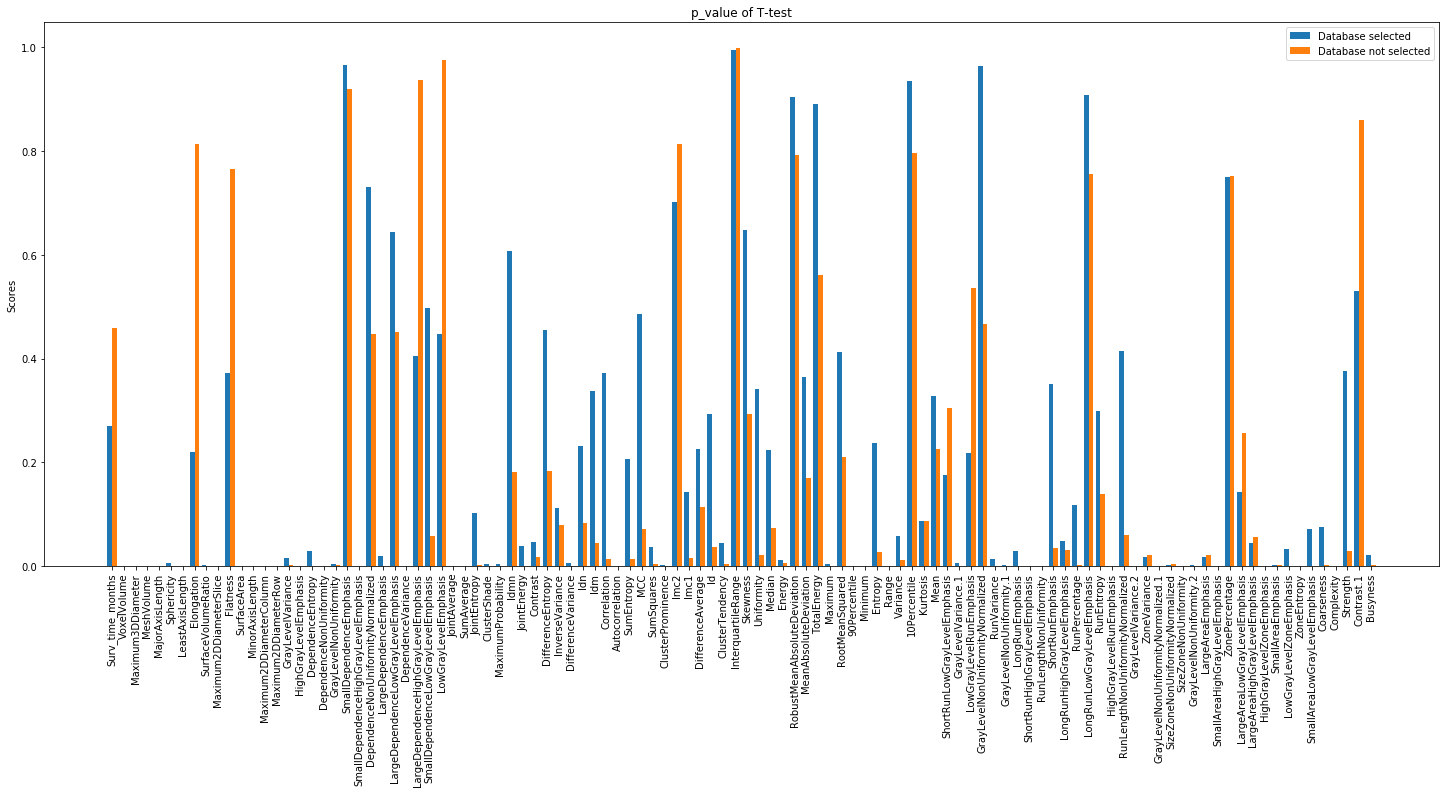

In [156]:
x = np.arange(len(labels))  # the label locations
width = 0.4  # the width of the bars

fig, ax = plt.subplots(figsize=(25, 10))
rects1 = ax.bar(x - width/2, t_test_list_selected, width, label='Database selected')
rects2 = ax.bar(x + width/2, t_test_list, width, label='Database not selected')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('p_value of T-test')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=90)
ax.legend()

#Welch’s t-test

Non assume che le due popolazioni abbiano uguale varianza

In [0]:
from scipy.stats import ttest_ind

##Welch’s t-test su dati selected

In [0]:
Wt_test_list_selected=[]
for column in train_data_bis_selected.columns:
   stat, p_value = scipy.stats.ttest_ind(train_data_bis_selected[column], test_data_bis[column], equal_var=False)
   Wt_test_list_selected.append(p_value)

In [158]:
max(Wt_test_list_selected)

0.9959050726991392

In [159]:
len(Wt_test_list_selected)

108

p-value alto   ---->   si accetta l'Hp zero   ---->   la differenza osservata è STATISTICAMENTE NON SIGNIFICATIVA

p-value basso ----> si rigetta l'Hp zero ----> la differenza osservata è STATISTICAMENTE SIGNIFICATIVA

Per aclune features si ha p-value alto, per altre p-value basso

##Welch’s t-test su dati non selected

In [0]:
Wt_test_list=[]
for column in train_data_bis.columns:
   stat, p_value = scipy.stats.ttest_ind(train_data_bis[column], test_data_bis[column], equal_var=False)
   Wt_test_list.append(p_value)

In [161]:
max(Wt_test_list)

0.9984909256516104

##Plot Welch’s t-test results

In [0]:
labels = train_data_bis_selected.columns

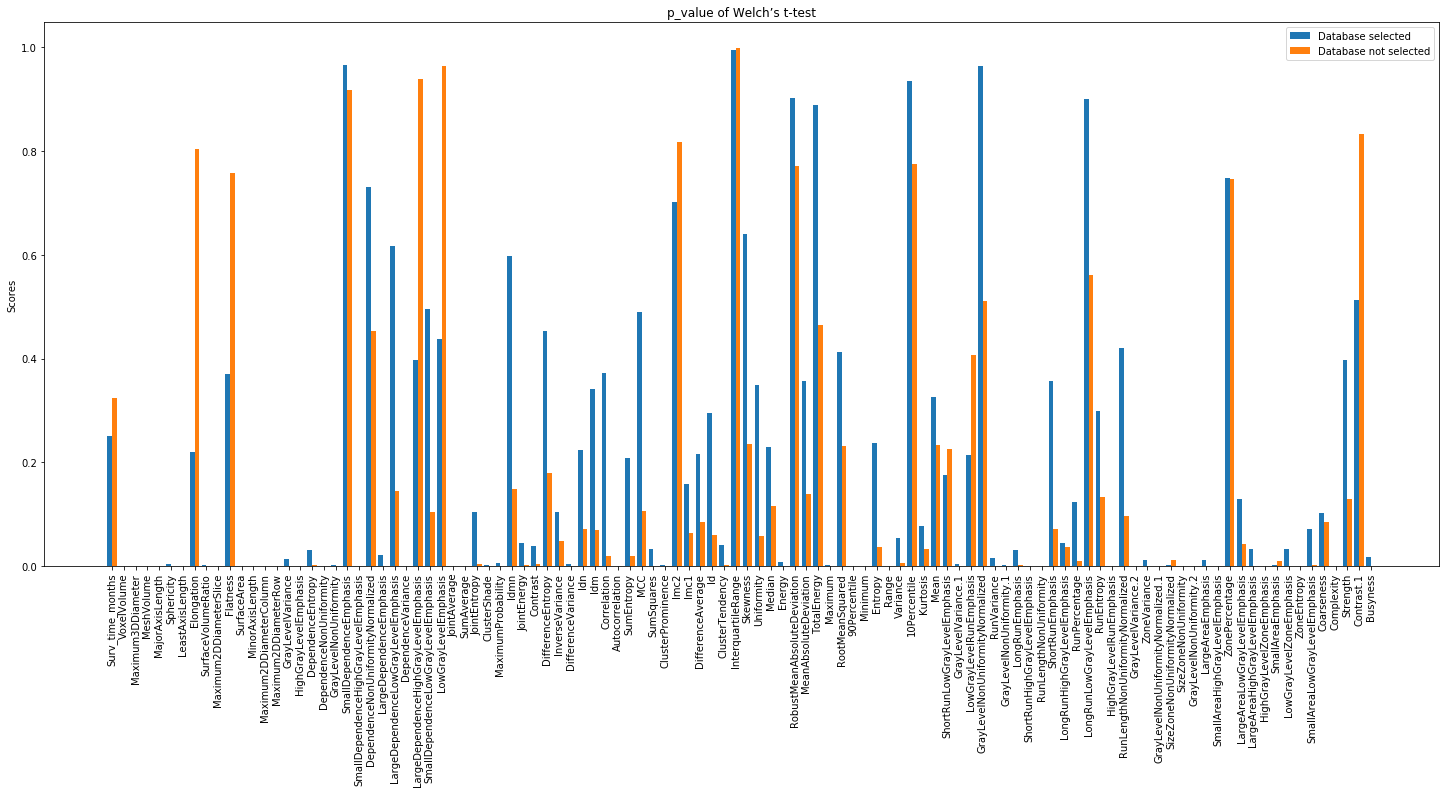

In [164]:
x = np.arange(len(labels))  # the label locations
width = 0.4  # the width of the bars

fig, ax = plt.subplots(figsize=(25, 10))
rects1 = ax.bar(x - width/2, Wt_test_list_selected, width, label='Database selected')
rects2 = ax.bar(x + width/2, Wt_test_list, width, label='Database not selected')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('p_value of Welch’s t-test')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=90)
ax.legend()

#Test di Mann-Whitney

 L'ipotesi nulla nel test di Mann-Whitney è quella che i due campioni siano tratti da una popolazione singola, e che dunque per questa ragione le loro distribuzioni di probabilità siano eguali. L'ipotesi alternativa è che uno dei campioni sia più grande in maniera stocastica. Questo richiede che i due campioni siano statisticamente indipendenti e l'osservazione ordinale o misurazioni continue (ad.es. uno può almeno dire di qualsiasi due osservazioni, quale sia la maggiore).

Nella formulazione più generale, si può pensare che il test possa essere preso come un modo per mettere a prova se l'ipotesi nulla che la probabilità di un'osservazione da una popolazione (X) ecceda una osservazione dalla seconda popolazione (Y) sia 0.5: P(X>Y)=0.5 versus P(X>Y)>0.5, P(X>Y)<0.5, oppure P(X>Y)≠0.5 in un'ipotesi alternativa. 